In [1]:
#ml.Q1 Answer
import pandas as pd
#Load the dataset into a pandas DataFrame:
df = pd.read_csv("instagram_reach.csv")

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [4]:
df.dtypes

Unnamed: 0            int64
S.No                  int64
USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted    object
Likes                 int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [6]:
df.describe()

,Unnamed: 0,S.No,Followers,Likes
count,100.000000,100.000000,100.00000,100.00000
mean,8.940000,16.240000,961.96000,46.48000
std,6.639064,7.384286,1014.62567,55.08698
min,0.000000,1.000000,11.00000,8.00000
25%,4.000000,10.750000,252.75000,19.00000
50%,8.000000,16.500000,612.00000,29.00000
75%,12.250000,22.250000,1197.00000,46.00000
max,26.000000,30.000000,4496.00000,349.00000


In [7]:
df.shape

(100, 8)

In [ ]:
#data cleaning
df.isnull().sum()

In [8]:
df[df.isnull().any(axis=1)] 

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
52,13,21,opensourcedworkplace,NaN,348,#HR #workplace#officedesign #iot #bigdata #off...,4 hours,17
67,5,17,remi_ole,NaN,2175,#entrepreneur #entrepreneurial#entrepreneurmin...,2 hours,41
72,10,25,kamalalshehabi,NaN,955,#qoute #success#motivation #entrepreneur #insp...,2 hours,20
79,6,11,anandvanjape,NaN,460,#Designer #style #artist#brand #logo #monogram...,2 hours,29
85,12,23,monde_informatique,NaN,2455,monde_informatique#client #project#product #pr...,3 hours,24
89,2,12,inmemovement,NaN,1196,#INME #inmemovement#indianeedsmoreentrepreneur...,2 hours,16


In [11]:
#only Caption column that has missing values so missing values will be dropped
df=df.dropna()

In [12]:
#because there is only 6 main features (columns), "Unnamed:0" and "S.No" columns will removed
df1 = df.copy()
df1.drop(['Unnamed: 0','S.No'], inplace=True,axis=1)

In [13]:
df1.isnull().sum()

USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [14]:
#Times since posted will be better if in type of int/float, so it will be changed
Time_since_posted_in_hours=[]

for i in df1['Time since posted']:
    Time_since_posted_in_hours.append(i.replace('hours', ''))

df1.rename(columns={'USERNAME':'Username'}, inplace=True)
se = pd.Series(Time_since_posted_in_hours)
df1['Times since posted (hours)'] = se.values
df1['Times since posted (hours)'] = pd.to_numeric(df1['Times since posted (hours)'])
df1 = df1.drop('Time since posted', axis=1)

In [17]:
df1.head()

,Username,Caption,Followers,Hashtags,Likes,Times since posted (hours)
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,139,11
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23,2
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25,2
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49,3
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30,3


In [19]:
df1.dtypes

Username                      object
Caption                       object
Followers                      int64
Hashtags                      object
Likes                          int64
Times since posted (hours)     int64
dtype: object

In [20]:
#Exploratory Data Analysis

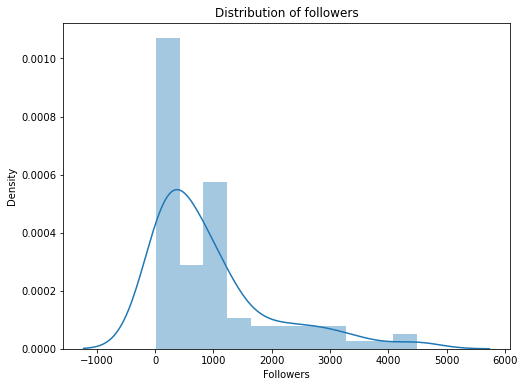

In [21]:
#Distribution of followers variable
plt.figure(figsize=(8, 6))
sns.distplot(df1['Followers'])
plt.title("Distribution of followers")
plt.show()

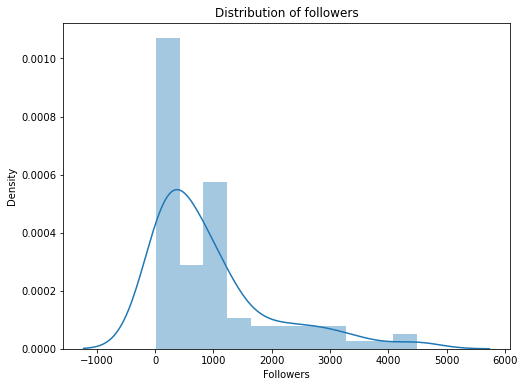

In [22]:
#Distribution of followers variable
plt.figure(figsize=(8, 6))
sns.distplot(df1['Followers'])
plt.title("Distribution of followers")
plt.show()

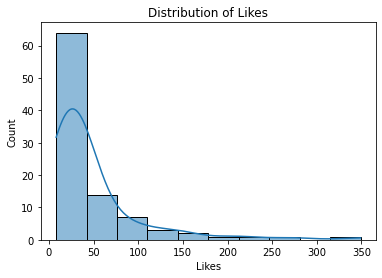

In [23]:
# Visualize the distribution of the target variable (Likes)
sns.histplot(df['Likes'], bins=10, kde=True)
plt.xlabel('Likes')
plt.ylabel('Count')
plt.title('Distribution of Likes')
plt.show()

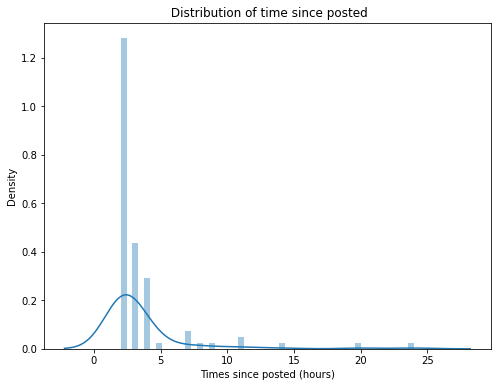

In [29]:
plt.figure(figsize=(8,6))
sns.distplot(df1['Times since posted (hours)'])
plt.title(' Distribution of time since posted')
plt.show()

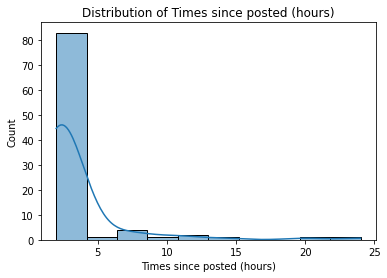

In [30]:
# Visualize the distribution of the target variable (Likes)
sns.histplot(df1['Times since posted (hours)'], bins=10, kde=True)
plt.xlabel('Times since posted (hours)')
plt.ylabel('Count')
plt.title('Distribution of Times since posted (hours)')
plt.show()

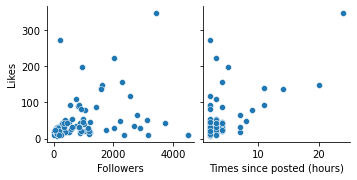

In [31]:
# Visualize the relationship between numerical features and the target variable
sns.pairplot(df1, x_vars=['Followers', 'Times since posted (hours)'], y_vars='Likes', kind='scatter')
plt.show()

In [ ]:
#Split the data into input features (X) and target variables (y)

In [41]:
X =df1[['Followers']]  # Input features
y_likes = df1['Likes']  # Target variable: Likes
y_time_since_posted = df1['Times since posted (hours)']  # Target variable: Time since posted

X_train, X_test, y_likes_train, y_likes_test, y_time_train, y_time_test = train_test_split(X, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

In [43]:
y_likes_train

66     31
15     53
70     21
82     31
30     90
     ... 
61     10
74     35
14     28
98    222
51    157
Name: Likes, Length: 75, dtype: int64

In [42]:
X_train

,Followers
66,151
15,971
70,1200
82,845
30,828
...,...
61,11
74,740
14,2904
98,2039


In [46]:
# Initialize and fit the model
model_likes = LinearRegression()
model_likes.fit(X_train, y_likes_train)


LinearRegression()

In [47]:
# Predict on the test set
y_likes_pred = model_likes.predict(X_test)

In [48]:
y_likes_pred 

array([39.16448004, 49.10770847, 42.61857727, 68.56240317, 56.20638623,
       39.25337225, 56.20638623, 48.62515077, 37.78030137, 37.38663588,
       50.59347823, 50.7204671 , 41.60266632, 36.72629376, 49.36168621,
       39.74862884, 36.84058374, 39.43115667, 47.76162646])

In [49]:
# Evaluate the model using mean squared error
mse_likes = mean_squared_error(y_likes_test, y_likes_pred)
print("Mean Squared Error (Likes):", mse_likes)

Mean Squared Error (Likes): 1182.2646244890766


In [ ]:
#Train a linear regression model for predicting the time since posted

In [50]:
# Initialize and fit the model
model_time = LinearRegression()
model_time.fit(X_train, y_time_train)


LinearRegression()

In [51]:
# Predict on the test set
y_time_pred = model_time.predict(X_test)


In [52]:
y_time_pred

array([2.70490808, 3.3948479 , 2.94458067, 4.74476847, 3.88741031,
       2.71107613, 3.88741031, 3.36136424, 2.60886282, 2.5815472 ,
       3.49794236, 3.50675385, 2.87408873, 2.53572744, 3.41247089,
       2.74544095, 2.54365778, 2.72341222, 3.30144609])

In [55]:
# Evaluate the model using mean squared error
mse_time = mean_squared_error(y_time_test, y_time_pred)

In [56]:
mse_time 

11.893185237149188

In [57]:
print("Mean Squared Error (Times since posted (hours)):", mse_time)

Mean Squared Error (Times since posted (hours)): 11.893185237149188
